<a href="https://colab.research.google.com/github/komalagnihotri18/SHALA_Assgn/blob/master/Assignment1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

**Importing Libraries  :**

In [0]:
#------------------------------------------------ Importing Libraries -----------------------------------#
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading Data :**

In [0]:
#----------------------------------------------Loading Data--------------------------------------------------------
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
dataset = pd.read_csv(data_url)

**Printing top 5 rows :**

 

In [0]:
#----------------------------------------------Printing Dataframe-------------------------------------------------
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


**Pre-processing of Dataset :**

In [0]:
#---------------------Dropping Unimportant columns like EmployeeNumber, EmployeeCount, ID--------------------------
df = pd.DataFrame(dataset)
df=df.drop(['Attrition','EmployeeNumber','EmployeeCount','ID'],axis=1)
X=df.iloc[:,:].values
X=pd.DataFrame(X)
# Loading Attrition in y----------------------------------
y=dataset.iloc[:,[1]].values
X


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0
1024,47,Travel_Rarely,359,Research & Development,2,4,Medical,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6
1025,24,Travel_Rarely,1476,Sales,4,1,Medical,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3
1026,32,Travel_Rarely,601,Sales,7,5,Marketing,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3


In [0]:
# Preprocessing of the Features---------------------------------------------------------
# Importing label encoder for converting object ata into numeric form-------------------
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label=LabelEncoder()
X[1]=label.fit_transform(X[1])
X[3]=label.fit_transform(X[3])
X[6]=label.fit_transform(X[6])
X[12]=label.fit_transform(X[12])
X[8]=label.fit_transform(X[8])
X[14]=label.fit_transform(X[14])
X[18]=label.fit_transform(X[18])

# Splitting data into training set and validation/test set------------------------------
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size= 0.2, random_state=42,shuffle=True)
print('the size of the training set{}'.format(x_train.shape))
print('-'*50)
print('the size of the validation set{}'.format(x_val.shape))
print('-'*50)

the size of the training set(822, 30)
--------------------------------------------------
the size of the validation set(206, 30)
--------------------------------------------------


Now we are going for different models to train them and test them. We can compare them on the basis of **Accuracy Score** of these models .

*   *Using Random Forest Classifier*
*   *Using AdaBoost Classifier*
*   *Using GradientBoost Classifier*





In [0]:
# Using Random Forest Classifier Model for traing Data=============
# Importing Random Forest classifier library========================
from sklearn.ensemble import RandomForestClassifier

Classifier1=RandomForestClassifier(n_estimators=500, criterion='entropy',random_state=0)
Classifier1.fit(x_train,y_train)
y_pred_RandomForest=Classifier1.predict(x_val)
#print(y_pred_RandomForest)
#print(len(y_pred_RandomForest))  

# Importing classification report,confusion matrix,accuracy score=============
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('='*70)
print('Confusion Matrix using Random Forest Model: '+ str(confusion_matrix(y_val,y_pred_RandomForest)))
print('='*70)
print('Classification report using Random Forest Model: '+str(classification_report(y_val,y_pred_RandomForest)))
print('='*70)
print('Accuracy score using Random Forest Model: '+str(accuracy_score(y_val,y_pred_RandomForest)))
print('='*70)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix using Random Forest Model: [[174   3]
 [ 25   4]]
Classification report using Random Forest Model:               precision    recall  f1-score   support

           0       0.87      0.98      0.93       177
           1       0.57      0.14      0.22        29

    accuracy                           0.86       206
   macro avg       0.72      0.56      0.57       206
weighted avg       0.83      0.86      0.83       206

Accuracy score using Random Forest Model: 0.8640776699029126


In [0]:
# Importing AdaBoost Classifier and training the model============================
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=500)
bbdt=bdt.fit(x_train, y_train)
y_pred1=bbdt.predict(x_val)

# Importing classification report,confusion matrix,accuracy score=============
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('='*70)
print('Confusion Matrix using AdaBoost Classifier: '+ str(confusion_matrix(y_val,y_pred1)))
print('='*70)
print('Classification report using AdaBoost Classifier: '+str(classification_report(y_val,y_pred1)))
print('='*70)
print('Accuracy score using AdaBoost Classifier: '+str(accuracy_score(y_val,y_pred1)))
print('='*70)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix using AdaBoost Classifier: [[168   9]
 [ 20   9]]
Classification report using AdaBoost Classifier:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       177
           1       0.50      0.31      0.38        29

    accuracy                           0.86       206
   macro avg       0.70      0.63      0.65       206
weighted avg       0.84      0.86      0.84       206

Accuracy score using AdaBoost Classifier: 0.8592233009708737


In [0]:
# Importing AdaBoost Classifier and training the model and testing===============
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(RandomForestClassifier(n_estimators = 1000, max_depth = 3),n_estimators=10000, random_state=47)
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_val)

# Importing classification report,confusion matrix,accuracy score=============
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('='*70)
print('Confusion Matrix using AdaBoost Classifier: '+ str(confusion_matrix(y_val,y_pred2)))
print('='*70)
print('Classification report using AdaBoost Classifier: '+str(classification_report(y_val,y_pred2)))
print('='*70)
print('Accuracy score using AdaBoost Classifier: '+str(accuracy_score(y_val,y_pred2)))
print('='*70)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix using AdaBoost Classifier: [[173   4]
 [ 20   9]]
Classification report using AdaBoost Classifier:               precision    recall  f1-score   support

           0       0.90      0.98      0.94       177
           1       0.69      0.31      0.43        29

    accuracy                           0.88       206
   macro avg       0.79      0.64      0.68       206
weighted avg       0.87      0.88      0.86       206

Accuracy score using AdaBoost Classifier: 0.883495145631068


In [0]:
# Importing GradientBoost Classifier and training the model and testing=================
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

# Importing classification report,confusion matrix, accuracy_score=====================
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('='*70)
print('Confusion Matrix using GradientBoost Classifier: '+ str(confusion_matrix(y_val,y_pred)))
print('='*70)
print('Classification report using GradientBoost Classifier: '+str(classification_report(y_val,y_pred)))
print('='*70)
print('Accuracy score using GradientBoost Classifier: '+str(accuracy_score(y_val,y_pred)))
print('='*70)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix using GradientBoost Classifier: [[168   9]
 [ 20   9]]
Classification report using GradientBoost Classifier:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       177
           1       0.50      0.31      0.38        29

    accuracy                           0.86       206
   macro avg       0.70      0.63      0.65       206
weighted avg       0.84      0.86      0.84       206

Accuracy score using GradientBoost Classifier: 0.8592233009708737


**From above models, it can be concluded that highest Accuracy Score obtained from AdaBoost Classifier which is more accurate than other models .**

We will do now **Exploratory Data Analysis(EDA)** :

1.    Plot which shows how many people left the job .
2.    Departmental Percentage using Pie Chart .
3.    Gender Distribution using Bar plot .










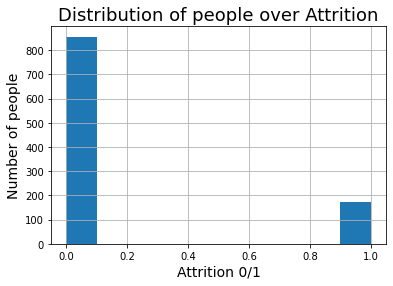

In [0]:
# Attrition Distribution============
dataset['Attrition'].hist()
plt.xlabel('Attrition 0/1',fontsize=14)
plt.ylabel('Number of people',fontsize=14)
plt.title('Distribution of people over Attrition',fontsize=18)
plt.show()

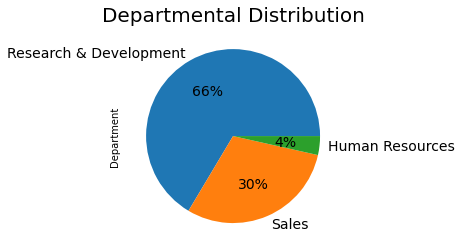

In [0]:
# Departmental Distribution==========
dataset['Department'].value_counts().plot(kind='pie',autopct='%1.0f%%',fontsize=14)
plt.title('Departmental Distribution',fontsize=20)
plt.show()

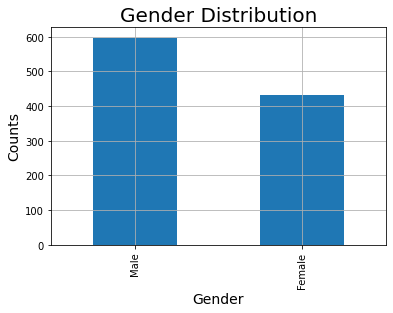

In [0]:
# Gender Distribution========
dataset['Gender'].value_counts().plot(kind='bar')
plt.grid()
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.title('Gender Distribution',fontsize=20)
plt.show()

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  